In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('sales_data.csv')

In [8]:
def calc_missing_values(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_values = pd.concat([missing_count, missing_percent], axis=1, keys=['Count', 'Percent'])
    return missing_values

print(calc_missing_values(data)) 

                  Count  Percent
store_id              0      0.0
customer_id           0      0.0
product_id            0      0.0
product_category      0      0.0
date                  0      0.0
amount                0      0.0
single_price          0      0.0
transaction_id        0      0.0


In [16]:
data.head()

,store_id,customer_id,product_id,product_category,date,amount,single_price,transaction_id
0,Store 01,Customer 1508,53642,Toys,4/1/2007 8:09,3,90.246230,1
1,Store 15,Customer 169,90945,Movies,2/15/2005 10:47,2,60.586312,2
2,Store 12,Customer 124,18548,Movies,9/27/2007 5:38,5,96.612695,3
3,Store 05,Customer 1988,85359,Books,5/7/2005 13:19,5,16.962671,4
4,Store 01,Customer 475,80069,Clothing,1/6/2008 17:36,5,65.215310,5


In [9]:
grouped = data.groupby(['store_id', 'product_category'])['amount'].sum().reset_index()

In [10]:
# Assign x and y coordinates for the cubes
stores = grouped['store_id'].unique()
categories = grouped['product_category'].unique()

In [11]:
store_dict = {store: i for i, store in enumerate(stores)}
category_dict = {cat: i for i, cat in enumerate(categories)}

In [12]:
grouped['x'] = grouped['store_id'].map(store_dict)
grouped['y'] = grouped['product_category'].map(category_dict)
grouped['z'] = grouped['amount']

In [13]:
max_amount = grouped['amount'].max()
print(max_amount)

23


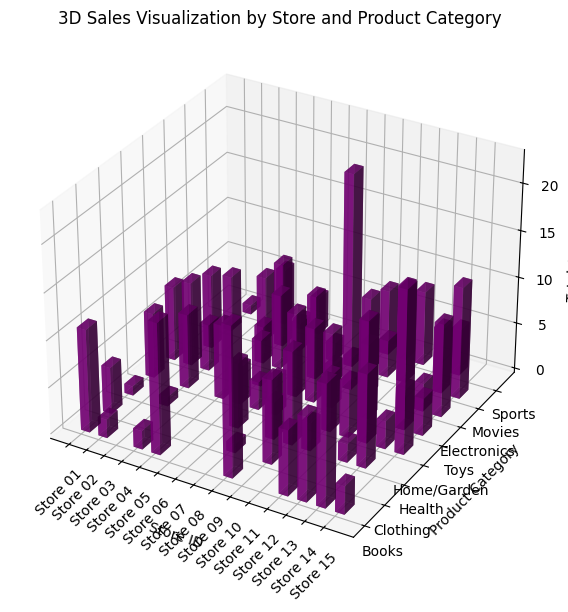

In [15]:
# Plot the 3D visualization
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Add cubes to the plot
for _, row in grouped.iterrows():
    ax.bar3d(
        row['x'], row['y'], 0,  # x, y, z coordinates
        dx=0.5, dy=0.5, dz=row['z'],  # dimensions
        color='purple', alpha=0.7
    )

# Customize the plot
ax.set_xticks(range(len(stores)))
ax.set_xticklabels(stores, rotation=45)
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.set_zlabel("Total Amount")

ax.set_xlabel("Store ID")
ax.set_ylabel("Product Category")
ax.set_title("3D Sales Visualization by Store and Product Category")

plt.show()